<a href="https://colab.research.google.com/github/alcarvalhox/analise_de_oleo/blob/main/Classificadores_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn==0.22

In [2]:
!python --version

Python 3.7.10


In [3]:
pip install xgboost

In [7]:
pip install six

In [4]:
pip install catboost

     |████████████████████████████████| 67.3MB 52kB/s 


In [5]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pandas_profiling import ProfileReport
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE,SVMSMOTE
from imblearn.pipeline import make_pipeline,Pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from collections import Counter


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

In [6]:
import sklearn
sklearn.__version__

'0.22'

# **Carrega dados**

In [6]:
analise_tx_pdr3 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr3.csv",sep = ',',encoding = 'utf8')


In [7]:
df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_FERRO',                 
#                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CHUMBO','TX_COBRE',
#                 'TX_SILICIO','TX_SODIO',
#                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
#                 'TX_SILICIO','TX_SODIO',
#                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['TX_FERRO','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

#df1= analise_tx_pdr3[['LIM_VISCOSIDADE','LIM_FULIGEM','LIM_OXIDACAO',
#                 'LIM_SULFATACAO','LIM_TBN','TARGET']]                 

df1.head()


,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,0.025301,-0.044848,-0.018425,-0.017532,-0.002053,-0.019313,0.012941,-0.029431,-0.00024,-0.049851,0.015430,-1.176821,-0.535369,0.160407,0.018075,0.596760,NORMAL
1,0.025301,-0.044848,-0.018425,-0.017532,-0.002053,-0.019313,0.012941,-0.029431,-0.00024,-0.049851,0.094030,-1.176821,-0.784232,0.301169,0.018075,0.121874,NORMAL
2,0.025301,-0.044848,-0.018425,-0.017532,-0.002053,-0.019313,0.012941,-0.029431,-0.00024,-0.049851,0.221207,-1.176821,-0.487415,0.565414,0.271041,0.121874,NORMAL
3,0.025301,-0.044848,-0.018425,-0.017532,-0.002053,-0.019313,0.012941,-0.029431,-0.00024,-0.049851,0.062505,-1.176821,-0.940661,0.013153,-0.114803,0.121874,NORMAL
4,0.025301,-0.044848,-0.018425,-0.017532,-0.002053,-0.019313,0.012941,-0.029431,-0.00024,-0.049851,-0.567258,1.069014,-1.499051,-2.026120,-1.682909,2.179395,NORMAL


In [8]:
filtro_target = df1['TARGET']!='NORMAL'
df1 = df1[filtro_target]


In [9]:
df1.groupby('TARGET').count()

,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN
TARGET,,,,,,,,,,,,,,,,
BAIXA,20745,20745,20745,20745,20745,20745,20745,20745,20745,20745,20745,20745,20745,20745,20745,20745
CRITICA,19554,19554,19554,19554,19554,19554,19554,19554,19554,19554,19554,19554,19554,19554,19554,19554


In [10]:
df1.shape

(40299, 17)

In [11]:
#colunas = ['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','NIQUEL','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE','AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO']
#colunas = ['PRATA','DIESEL','SODIO','ESTANHO','NIQUEL','AGUA','Target']
#cols = ['Target']

array = df1.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:16]
Y = array[:,16]
y = LabelEncoder().fit_transform(Y)




X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)


In [53]:
X_train.shape

(30224, 13)

In [54]:
y_test.shape

(10075,)

In [32]:
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [12]:


y_label = Y
#X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.30, random_state=42)

classes =[]
labeles=np.unique(y_label)
for v in labeles:
    classes.append('Classe '+ str(v))
print(classes)

['Classe BAIXA', 'Classe CRITICA']


In [38]:
np.unique(y_train_smt)
from collections import Counter
Counter(y_train_smt).values()

dict_values([15606, 15606, 15606])

# **Análise por score com gráfico de barras de vários classificadores**

In [12]:
names = ["Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "Neural_Net", "AdaBoost","QDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]
  

In [14]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [15]:
df = pd.DataFrame()
df['Classificador'] = names
df['Score'] = scores
df

,Classificador,Score
0,Nearest_Neighbors,0.670302
1,Decision_Tree,0.613585
2,Extra_Trees,0.687952
3,Random_Forest,0.652752
4,Neural_Net,0.693704
5,AdaBoost,0.544274
6,QDA,0.557858


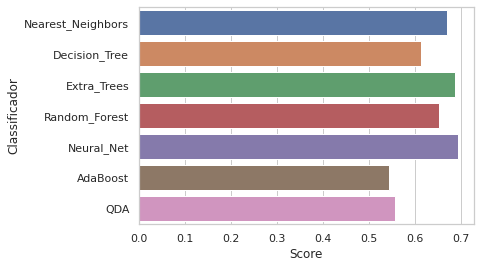

In [16]:
sns.set(style="whitegrid")
ax=sns.barplot(y="Classificador", x="Score", data=df)
ax.get_figure()

# **Análise de vários classificadores - indicadores**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Logistic_Regression
                precision    recall  f1-score   support

  Classe BAIXA       0.63      0.49      0.55      5186
Classe CRITICA       0.58      0.55      0.56      4889
 Classe NORMAL       0.00      0.50      0.01        10

      accuracy                           0.52     10085
     macro avg       0.40      0.51      0.37     10085
  weighted avg       0.60      0.52      0.56     10085

Training Score:0.5189224921500578
Cross V Score: 0.5242769790117336 +/- 0.01015553111644095
Testing Score: 0.5201784828953891
Cross & Test Diff: 0.004098496116344497
Standard Deviations Away: 0.40357279883760844
[[2551 1955  680]
 [1507 2690  692]
 [   2    3    5]]
Classificador:  Logistic_Regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Logistic_Regression
                precision    recall  f1-score   support

  Classe BAIXA       0.63      0.49      0.55      5186
Classe CRITICA       0.58      0.55      0.56      4889
 Classe NORMAL       0.00      0.50      0.01        10

      accuracy                           0.52     10085
     macro avg       0.40      0.51      0.37     10085
  weighted avg       0.60      0.52      0.56     10085

Training Score:0.5189224921500578
Cross V Score: 0.5242769790117336 +/- 0.01015553111644095
Testing Score: 0.5201784828953891
Cross & Test Diff: 0.004098496116344497
Standard Deviations Away: 0.40357279883760844
[[2551 1955  680]
 [1507 2690  692]
 [   2    3    5]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Nearest_Neighbors
                precision    recall  f1-score   support

  Classe BAIXA       0.70      0.65      0.67      5186
Classe CRITICA       0.66      0.70      0.67      4889
 Classe NORMAL       0.05      0.30      0.08        10

      accuracy                           0.67     10085
     macro avg       0.47      0.55      0.48     10085
  weighted avg       0.68      0.67      0.67     10085

Training Score:0.7858535779210047
Cross V Score: 0.6639563708477937 +/- 0.0030152039852719835
Testing Score: 0.6720872583044125
Cross & Test Diff: -0.00813088745661883
Standard Deviations Away: -2.696629314744485
[[3375 1785   26]
 [1454 3400   35]
 [   4    3    3]]
Classificador:  Nearest_Neighbors


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Nearest_Neighbors
                precision    recall  f1-score   support

  Classe BAIXA       0.70      0.65      0.67      5186
Classe CRITICA       0.66      0.70      0.67      4889
 Classe NORMAL       0.05      0.30      0.08        10

      accuracy                           0.67     10085
     macro avg       0.47      0.55      0.48     10085
  weighted avg       0.68      0.67      0.67     10085

Training Score:0.7858535779210047
Cross V Score: 0.6639563708477937 +/- 0.0030152039852719835
Testing Score: 0.6720872583044125
Cross & Test Diff: -0.00813088745661883
Standard Deviations Away: -2.696629314744485
[[3375 1785   26]
 [1454 3400   35]
 [   4    3    3]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Decision_Tree
                precision    recall  f1-score   support

  Classe BAIXA       0.61      0.58      0.59      5186
Classe CRITICA       0.59      0.56      0.57      4889
 Classe NORMAL       0.01      0.30      0.01        10

      accuracy                           0.57     10085
     macro avg       0.40      0.48      0.39     10085
  weighted avg       0.60      0.57      0.58     10085

Training Score:0.5837051726987275
Cross V Score: 0.5756073376301437 +/- 0.004797266913004523
Testing Score: 0.5699553792761527
Cross & Test Diff: 0.005651958353991016
Standard Deviations Away: 1.1781621611817301
[[2992 1932  262]
 [1883 2753  253]
 [   3    4    3]]
Classificador:  Decision_Tree


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Decision_Tree
                precision    recall  f1-score   support

  Classe BAIXA       0.61      0.58      0.59      5186
Classe CRITICA       0.59      0.56      0.57      4889
 Classe NORMAL       0.01      0.30      0.01        10

      accuracy                           0.57     10085
     macro avg       0.40      0.48      0.39     10085
  weighted avg       0.60      0.57      0.58     10085

Training Score:0.5837051726987275
Cross V Score: 0.5756073376301437 +/- 0.004797266913004523
Testing Score: 0.5699553792761527
Cross & Test Diff: 0.005651958353991016
Standard Deviations Away: 1.1781621611817301
[[2992 1932  262]
 [1883 2753  253]
 [   3    4    3]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Extra_Trees
                precision    recall  f1-score   support

  Classe BAIXA       0.75      0.73      0.74      5186
Classe CRITICA       0.72      0.75      0.73      4889
 Classe NORMAL       0.25      0.10      0.14        10

      accuracy                           0.74     10085
     macro avg       0.57      0.52      0.54     10085
  weighted avg       0.74      0.74      0.74     10085

Training Score:1.0
Cross V Score: 0.7278466369195175 +/- 0.0013311538962552981
Testing Score: 0.7363411006445215
Cross & Test Diff: -0.008494463725004064
Standard Deviations Away: -6.381278489962768
[[3776 1410    0]
 [1237 3649    3]
 [   7    2    1]]
Classificador:  Extra_Trees


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Extra_Trees
                precision    recall  f1-score   support

  Classe BAIXA       0.75      0.73      0.74      5186
Classe CRITICA       0.72      0.74      0.73      4889
 Classe NORMAL       0.20      0.10      0.13        10

      accuracy                           0.73     10085
     macro avg       0.56      0.52      0.53     10085
  weighted avg       0.73      0.73      0.73     10085

Training Score:1.0
Cross V Score: 0.7295653610973393 +/- 0.002360875416087085
Testing Score: 0.7344571145265245
Cross & Test Diff: -0.004891753429185242
Standard Deviations Away: -2.0720082880497075
[[3793 1393    0]
 [1272 3613    4]
 [   5    4    1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Random_Forest
                precision    recall  f1-score   support

  Classe BAIXA       0.67      0.62      0.64      5186
Classe CRITICA       0.64      0.63      0.63      4889
 Classe NORMAL       0.01      0.40      0.01        10

      accuracy                           0.62     10085
     macro avg       0.44      0.55      0.43     10085
  weighted avg       0.66      0.62      0.64     10085

Training Score:0.6398942323582879
Cross V Score: 0.629681044455462 +/- 0.004125329975573266
Testing Score: 0.6221120475954388
Cross & Test Diff: 0.007568996860023214
Standard Deviations Away: 1.8347615596426097
[[3202 1729  255]
 [1553 3068  268]
 [   5    1    4]]
Classificador:  Random_Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Random_Forest
                precision    recall  f1-score   support

  Classe BAIXA       0.68      0.63      0.65      5186
Classe CRITICA       0.64      0.64      0.64      4889
 Classe NORMAL       0.01      0.40      0.02        10

      accuracy                           0.63     10085
     macro avg       0.44      0.55      0.44     10085
  weighted avg       0.66      0.63      0.65     10085

Training Score:0.6467030242935052
Cross V Score: 0.6271360105767642 +/- 0.003871223469059994
Testing Score: 0.6314328210213188
Cross & Test Diff: -0.004296810444554655
Standard Deviations Away: -1.1099360393157571
[[3257 1711  218]
 [1539 3107  243]
 [   5    1    4]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Neural_Net
                precision    recall  f1-score   support

  Classe BAIXA       0.71      0.68      0.69      5186
Classe CRITICA       0.69      0.66      0.68      4889
 Classe NORMAL       0.01      0.60      0.02        10

      accuracy                           0.67     10085
     macro avg       0.47      0.65      0.46     10085
  weighted avg       0.70      0.67      0.68     10085

Training Score:0.6755247066600562
Cross V Score: 0.6712278962155015 +/- 0.0019198857354431218
Testing Score: 0.6684184432325235
Cross & Test Diff: 0.002809452982977967
Standard Deviations Away: 1.4633438496429723
[[3507 1429  250]
 [1417 3228  244]
 [   4    0    6]]
Classificador:  Neural_Net


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  Neural_Net
                precision    recall  f1-score   support

  Classe BAIXA       0.73      0.66      0.69      5186
Classe CRITICA       0.69      0.69      0.69      4889
 Classe NORMAL       0.01      0.60      0.02        10

      accuracy                           0.67     10085
     macro avg       0.48      0.65      0.47     10085
  weighted avg       0.71      0.67      0.69     10085

Training Score:0.6773756403900182
Cross V Score: 0.6674929763675426 +/- 0.0032909955876104214
Testing Score: 0.6725830441249381
Cross & Test Diff: -0.005090067757395511
Standard Deviations Away: -1.546665020323345
[[3408 1532  246]
 [1283 3369  237]
 [   4    0    6]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  AdaBoost
                precision    recall  f1-score   support

  Classe BAIXA       0.55      0.72      0.62      5186
Classe CRITICA       0.55      0.37      0.44      4889
 Classe NORMAL       0.02      0.10      0.03        10

      accuracy                           0.55     10085
     macro avg       0.37      0.39      0.36     10085
  weighted avg       0.55      0.55      0.53     10085

Training Score:0.5616592298793588
Cross V Score: 0.5477111221285738 +/- 0.005224577918406079
Testing Score: 0.5468517600396628
Cross & Test Diff: 0.0008593620889109088
Standard Deviations Away: 0.16448450043847448
[[3723 1438   25]
 [3072 1791   26]
 [   5    4    1]]
Classificador:  AdaBoost


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Classificador:  AdaBoost
                precision    recall  f1-score   support

  Classe BAIXA       0.55      0.72      0.62      5186
Classe CRITICA       0.55      0.37      0.44      4889
 Classe NORMAL       0.02      0.10      0.03        10

      accuracy                           0.55     10085
     macro avg       0.37      0.39      0.36     10085
  weighted avg       0.55      0.55      0.53     10085

Training Score:0.5616592298793588
Cross V Score: 0.5477111221285738 +/- 0.005224577918406079
Testing Score: 0.5468517600396628
Cross & Test Diff: 0.0008593620889109088
Standard Deviations Away: 0.16448450043847448
[[3723 1438   25]
 [3072 1791   26]
 [   5    4    1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Fun

Classificador:  QDA
                precision    recall  f1-score   support

  Classe BAIXA       0.56      0.71      0.63      5186
Classe CRITICA       0.65      0.31      0.42      4889
 Classe NORMAL       0.01      0.70      0.01        10

      accuracy                           0.52     10085
     macro avg       0.40      0.57      0.35     10085
  weighted avg       0.60      0.52      0.52     10085

Training Score:0.5263262270699058
Cross V Score: 0.5746488183771278 +/- 0.012005617409085692
Testing Score: 0.5166088249876054
Cross & Test Diff: 0.05803999338952237
Standard Deviations Away: 4.83440304749329
[[3702  818  666]
 [2950 1501  438]
 [   3    0    7]]
Classificador:  QDA


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Fun

Classificador:  QDA
                precision    recall  f1-score   support

  Classe BAIXA       0.56      0.71      0.63      5186
Classe CRITICA       0.65      0.31      0.42      4889
 Classe NORMAL       0.01      0.70      0.01        10

      accuracy                           0.52     10085
     macro avg       0.40      0.57      0.35     10085
  weighted avg       0.60      0.52      0.52     10085

Training Score:0.5263262270699058
Cross V Score: 0.5746488183771278 +/- 0.012005617409085692
Testing Score: 0.5166088249876054
Cross & Test Diff: 0.05803999338952237
Standard Deviations Away: 4.83440304749329
[[3702  818  666]
 [2950 1501  438]
 [   3    0    7]]


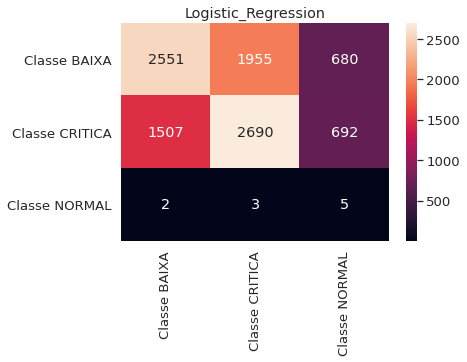

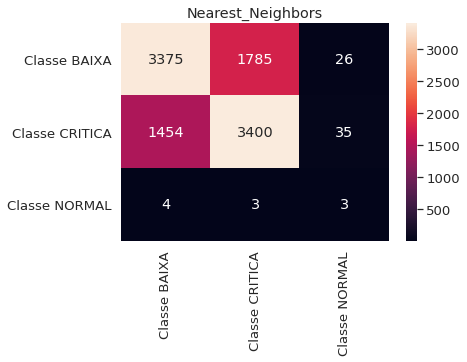

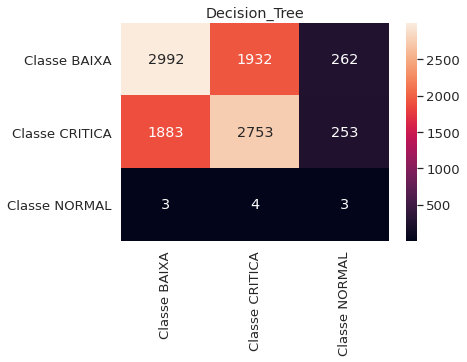

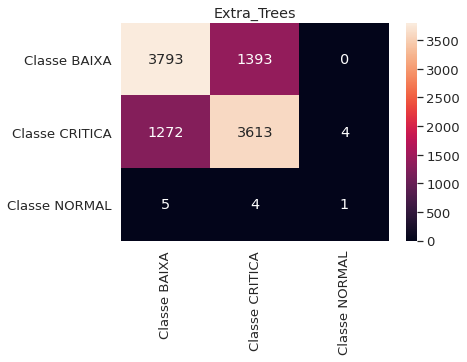

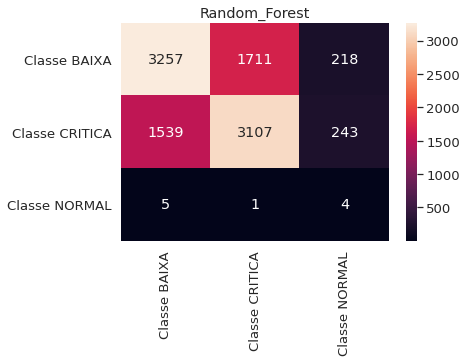

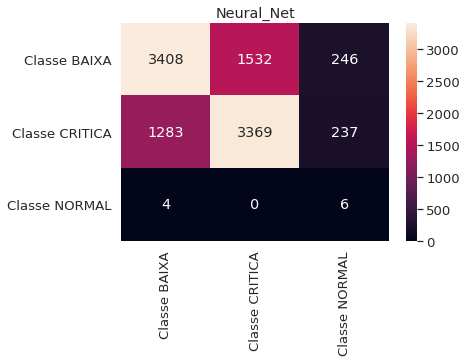

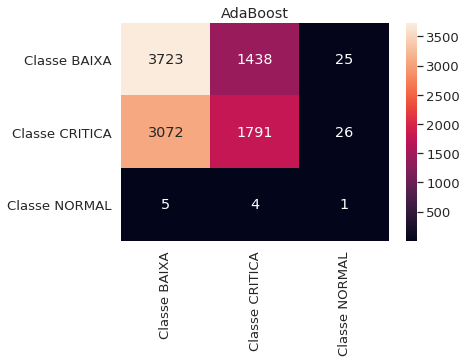

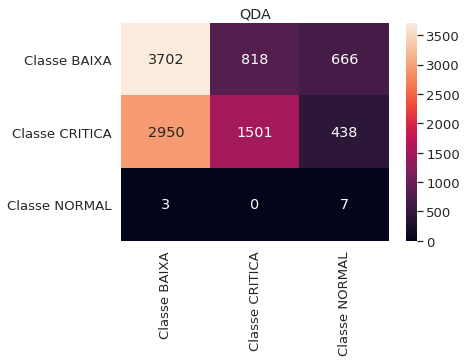

In [20]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

random_seed = 1234

names = ["Logistic_Regression","Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "Neural_Net", "AdaBoost","QDA"]

classifiers = [
    LogisticRegression(),             
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=100, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = imba_pipeline.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(df_cm,annot=True,fmt='d')
    #score = clf.score(X_test, y_test)
    #scores.append(score)

   

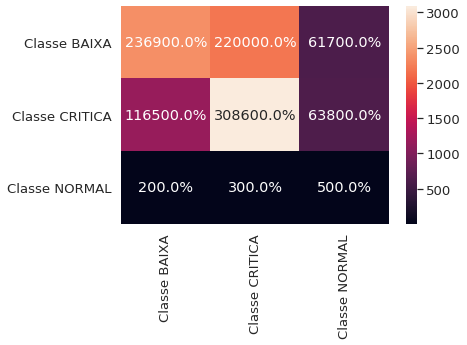

In [56]:
sns.set(font_scale=1.2)
plt.figure(figsize=(6,4))
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

sns.heatmap(df_cm, annot=True, fmt=".1%")
#sns.heatmap(cm, annot=True,fmt='d',labels = classes)

# **GridSearch**

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV 
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
%matplotlib inline

adasyn = ADASYN(random_state=88)
smt = SMOTE()
X_adasyn, y_adasyn = smt.fit_resample(X_train, y_train)

models = [{'name': 'logreg','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=88),
           'grid': {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}},
          
          {'name': 'knn','label':'K Nearest Neighbors',
           'classifier':KNeighborsClassifier(),
           'grid': {"n_neighbors":np.arange(8)+1}},
          
          {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=88),
           'grid': {"max_depth":np.arange(8)+1}},
          
          {'name': 'etc','label': 'Extra Tree', 
           'classifier': ExtraTreesClassifier(random_state=88),
           'grid': {'n_estimators': [100,200, 500],'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}},

                 
          {'name': 'ct', 'label': 'CatBoost',
           'classifier': CatBoostClassifier(random_state=88),
           'grid': {'learning_rate': [0.03, 0.1],'depth': [4, 6, 10],'l2_leaf_reg': [1, 3, 5, 7, 9]}},
          
          {'name': 'mlp', 'label': 'MLP',
           'classifier':MLPClassifier(),
           'grid': {'alpha': [0.0001,0.001,0.01,1], 'max_iter': [200,500,1000]}}]
 
            

def model_selection(classifier, name, grid, X_train, y_train, scoring):
    random_seed = 1234
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), classifier)

    #cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = 3, scoring = 'accuracy')
    #clf = imba_pipeline.fit(X_train, y_train)

    gridsearch_cv=GridSearchCV(classifier,grid,cv=5,scoring = scoring)
    
    gridsearch_cv.fit(X_train, y_train)
    
    results_dict = {}
    
    results_dict['classifier_name'] = name    
    results_dict['classifier'] = gridsearch_cv.best_estimator_
    results_dict['best_params'] = gridsearch_cv.best_params_
    results_dict['Accuracy'] = gridsearch_cv.best_score_
    
    return(results_dict)
results = []
for m in models:    
    print(m['name'])    
    results.append(model_selection(m['classifier'], 
                                   m['name'],
                                   m['grid'],
                                   X_adasyn, 
                                   y_adasyn, 
                                   'accuracy'))      
    print('completed')

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending = False)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


logreg


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

Streaming output truncated to the last 5000 lines.
2:	learn: 0.6573540	total: 214ms	remaining: 1m 11s
3:	learn: 0.6479885	total: 293ms	remaining: 1m 12s
4:	learn: 0.6414807	total: 365ms	remaining: 1m 12s
5:	learn: 0.6339538	total: 435ms	remaining: 1m 12s
6:	learn: 0.6261764	total: 521ms	remaining: 1m 13s
7:	learn: 0.6202942	total: 591ms	remaining: 1m 13s
8:	learn: 0.6152991	total: 659ms	remaining: 1m 12s
9:	learn: 0.6103726	total: 747ms	remaining: 1m 13s
10:	learn: 0.6058042	total: 819ms	remaining: 1m 13s
11:	learn: 0.6020560	total: 888ms	remaining: 1m 13s
12:	learn: 0.5989263	total: 969ms	remaining: 1m 13s
13:	learn: 0.5944316	total: 1.04s	remaining: 1m 13s
14:	learn: 0.5907736	total: 1.11s	remaining: 1m 13s
15:	learn: 0.5871942	total: 1.21s	remaining: 1m 14s
16:	learn: 0.5839212	total: 1.29s	remaining: 1m 14s
17:	learn: 0.5815162	total: 1.37s	remaining: 1m 14s
18:	learn: 0.5787152	total: 1.45s	remaining: 1m 14s
19:	learn: 0.5765174	total: 1.52s	remaining: 1m 14s
20:	learn: 0.5741681	

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


completed


In [58]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending = False)
results_df

,classifier_name,classifier,best_params,Accuracy
4,ct,<catboost.core.CatBoostClassifier object at 0x...,"{'depth': 10, 'l2_leaf_reg': 5, 'learning_rate...",0.748474
5,mlp,"MLPClassifier(activation='relu', alpha=0.01, b...","{'alpha': 0.01, 'max_iter': 1000}",0.727939
1,knn,"KNeighborsClassifier(algorithm='auto', leaf_si...",{'n_neighbors': 7},0.694229
3,etc,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...","{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.661321
2,dsc,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",{'max_depth': 8},0.647632
0,logreg,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l2'}",0.593708


In [60]:
results_df['best_params'][4]

{'depth': 10, 'l2_leaf_reg': 5, 'learning_rate': 0.03}

# **Análise de Único Classificador**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6887701	total: 49ms	remaining: 48.9s
1:	learn: 0.6846857	total: 97.3ms	remaining: 48.5s
2:	learn: 0.6809188	total: 148ms	remaining: 49.1s
3:	learn: 0.6772200	total: 196ms	remaining: 48.8s
4:	learn: 0.6732721	total: 246ms	remaining: 48.9s
5:	learn: 0.6696389	total: 302ms	remaining: 50s
6:	learn: 0.6665537	total: 356ms	remaining: 50.4s
7:	learn: 0.6633864	total: 407ms	remaining: 50.4s
8:	learn: 0.6602664	total: 456ms	remaining: 50.2s
9:	learn: 0.6572496	total: 511ms	remaining: 50.6s
10:	learn: 0.6545329	total: 559ms	remaining: 50.3s
11:	learn: 0.6521286	total: 607ms	remaining: 49.9s
12:	learn: 0.6494679	total: 656ms	remaining: 49.8s
13:	learn: 0.6469493	total: 706ms	remaining: 49.7s
14:	learn: 0.6445117	total: 765ms	remaining: 50.2s
15:	learn: 0.6423691	total: 815ms	remaining: 50.1s
16:	learn: 0.6399398	total: 870ms	remaining: 50.3s
17:	learn: 0.6379991	total: 918ms	remaining: 50.1s
18:	learn: 0.6357652	total: 973ms	remaining: 50.2s
19:	learn: 0.6337909	total: 1.02s	remaining

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6889987	total: 48.4ms	remaining: 48.3s
1:	learn: 0.6848237	total: 96ms	remaining: 47.9s
2:	learn: 0.6811477	total: 145ms	remaining: 48.1s
3:	learn: 0.6776642	total: 194ms	remaining: 48.2s
4:	learn: 0.6739194	total: 277ms	remaining: 55.1s
5:	learn: 0.6706651	total: 326ms	remaining: 54s
6:	learn: 0.6676775	total: 376ms	remaining: 53.3s
7:	learn: 0.6645793	total: 425ms	remaining: 52.7s
8:	learn: 0.6615727	total: 484ms	remaining: 53.3s
9:	learn: 0.6589378	total: 542ms	remaining: 53.7s
10:	learn: 0.6563075	total: 595ms	remaining: 53.5s
11:	learn: 0.6539823	total: 645ms	remaining: 53.1s
12:	learn: 0.6512946	total: 697ms	remaining: 52.9s
13:	learn: 0.6488580	total: 751ms	remaining: 52.9s
14:	learn: 0.6462256	total: 801ms	remaining: 52.6s
15:	learn: 0.6440923	total: 850ms	remaining: 52.3s
16:	learn: 0.6421013	total: 908ms	remaining: 52.5s
17:	learn: 0.6400669	total: 957ms	remaining: 52.2s
18:	learn: 0.6379702	total: 1.01s	remaining: 52.1s
19:	learn: 0.6362080	total: 1.06s	remaining

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6887558	total: 48.4ms	remaining: 48.4s
1:	learn: 0.6847386	total: 97.8ms	remaining: 48.8s
2:	learn: 0.6811483	total: 148ms	remaining: 49.4s
3:	learn: 0.6777784	total: 198ms	remaining: 49.2s
4:	learn: 0.6738580	total: 251ms	remaining: 50s
5:	learn: 0.6703751	total: 301ms	remaining: 49.8s
6:	learn: 0.6673443	total: 350ms	remaining: 49.7s
7:	learn: 0.6641297	total: 397ms	remaining: 49.3s
8:	learn: 0.6610232	total: 446ms	remaining: 49.1s
9:	learn: 0.6584733	total: 505ms	remaining: 50s
10:	learn: 0.6556690	total: 553ms	remaining: 49.7s
11:	learn: 0.6532332	total: 600ms	remaining: 49.4s
12:	learn: 0.6506719	total: 648ms	remaining: 49.2s
13:	learn: 0.6481534	total: 703ms	remaining: 49.5s
14:	learn: 0.6456671	total: 768ms	remaining: 50.4s
15:	learn: 0.6433305	total: 819ms	remaining: 50.4s
16:	learn: 0.6409532	total: 867ms	remaining: 50.1s
17:	learn: 0.6389223	total: 916ms	remaining: 50s
18:	learn: 0.6368405	total: 964ms	remaining: 49.8s
19:	learn: 0.6351138	total: 1.02s	remaining: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6890561	total: 56.1ms	remaining: 56s
1:	learn: 0.6850287	total: 108ms	remaining: 54.1s
2:	learn: 0.6809837	total: 162ms	remaining: 54s
3:	learn: 0.6775413	total: 219ms	remaining: 54.4s
4:	learn: 0.6734955	total: 285ms	remaining: 56.7s
5:	learn: 0.6704609	total: 351ms	remaining: 58.1s
6:	learn: 0.6676112	total: 406ms	remaining: 57.6s
7:	learn: 0.6644919	total: 459ms	remaining: 56.9s
8:	learn: 0.6612856	total: 518ms	remaining: 57s
9:	learn: 0.6585845	total: 571ms	remaining: 56.5s
10:	learn: 0.6557373	total: 629ms	remaining: 56.5s
11:	learn: 0.6532830	total: 683ms	remaining: 56.3s
12:	learn: 0.6508267	total: 745ms	remaining: 56.6s
13:	learn: 0.6485806	total: 801ms	remaining: 56.4s
14:	learn: 0.6462711	total: 855ms	remaining: 56.1s
15:	learn: 0.6441685	total: 907ms	remaining: 55.8s
16:	learn: 0.6418551	total: 965ms	remaining: 55.8s
17:	learn: 0.6396399	total: 1.02s	remaining: 55.6s
18:	learn: 0.6377161	total: 1.08s	remaining: 55.6s
19:	learn: 0.6360343	total: 1.13s	remaining: 5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6887701	total: 49.2ms	remaining: 49.2s
1:	learn: 0.6846857	total: 98.8ms	remaining: 49.3s
2:	learn: 0.6809188	total: 147ms	remaining: 48.7s
3:	learn: 0.6772200	total: 194ms	remaining: 48.2s
4:	learn: 0.6732721	total: 242ms	remaining: 48.2s
5:	learn: 0.6696389	total: 301ms	remaining: 49.8s
6:	learn: 0.6665537	total: 349ms	remaining: 49.6s
7:	learn: 0.6633864	total: 398ms	remaining: 49.3s
8:	learn: 0.6602664	total: 449ms	remaining: 49.5s
9:	learn: 0.6572496	total: 503ms	remaining: 49.8s
10:	learn: 0.6545329	total: 555ms	remaining: 49.9s
11:	learn: 0.6521286	total: 612ms	remaining: 50.4s
12:	learn: 0.6494679	total: 663ms	remaining: 50.4s
13:	learn: 0.6469493	total: 716ms	remaining: 50.4s
14:	learn: 0.6445117	total: 768ms	remaining: 50.4s
15:	learn: 0.6423691	total: 817ms	remaining: 50.2s
16:	learn: 0.6399398	total: 875ms	remaining: 50.6s
17:	learn: 0.6379991	total: 930ms	remaining: 50.8s
18:	learn: 0.6357652	total: 979ms	remaining: 50.6s
19:	learn: 0.6337909	total: 1.03s	remai

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6889987	total: 50.1ms	remaining: 50.1s
1:	learn: 0.6848237	total: 99.3ms	remaining: 49.6s
2:	learn: 0.6811477	total: 156ms	remaining: 51.9s
3:	learn: 0.6776642	total: 205ms	remaining: 51s
4:	learn: 0.6739194	total: 258ms	remaining: 51.3s
5:	learn: 0.6706651	total: 320ms	remaining: 53.1s
6:	learn: 0.6676775	total: 369ms	remaining: 52.4s
7:	learn: 0.6645793	total: 417ms	remaining: 51.7s
8:	learn: 0.6615727	total: 473ms	remaining: 52.1s
9:	learn: 0.6589378	total: 521ms	remaining: 51.6s
10:	learn: 0.6563075	total: 572ms	remaining: 51.4s
11:	learn: 0.6539823	total: 620ms	remaining: 51s
12:	learn: 0.6512946	total: 667ms	remaining: 50.6s
13:	learn: 0.6488580	total: 728ms	remaining: 51.3s
14:	learn: 0.6462256	total: 783ms	remaining: 51.4s
15:	learn: 0.6440923	total: 836ms	remaining: 51.4s
16:	learn: 0.6421013	total: 886ms	remaining: 51.2s
17:	learn: 0.6400669	total: 936ms	remaining: 51s
18:	learn: 0.6379702	total: 987ms	remaining: 50.9s
19:	learn: 0.6362080	total: 1.03s	remaining: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6887558	total: 48.9ms	remaining: 48.8s
1:	learn: 0.6847386	total: 97.7ms	remaining: 48.8s
2:	learn: 0.6811483	total: 146ms	remaining: 48.6s
3:	learn: 0.6777784	total: 194ms	remaining: 48.3s
4:	learn: 0.6738580	total: 243ms	remaining: 48.4s
5:	learn: 0.6703751	total: 302ms	remaining: 50.1s
6:	learn: 0.6673443	total: 354ms	remaining: 50.2s
7:	learn: 0.6641297	total: 403ms	remaining: 50s
8:	learn: 0.6610232	total: 457ms	remaining: 50.4s
9:	learn: 0.6584733	total: 506ms	remaining: 50.1s
10:	learn: 0.6556690	total: 559ms	remaining: 50.3s
11:	learn: 0.6532332	total: 608ms	remaining: 50s
12:	learn: 0.6506719	total: 657ms	remaining: 49.9s
13:	learn: 0.6481534	total: 707ms	remaining: 49.8s
14:	learn: 0.6456671	total: 764ms	remaining: 50.2s
15:	learn: 0.6433305	total: 815ms	remaining: 50.1s
16:	learn: 0.6409532	total: 864ms	remaining: 50s
17:	learn: 0.6389223	total: 913ms	remaining: 49.8s
18:	learn: 0.6368405	total: 978ms	remaining: 50.5s
19:	learn: 0.6351138	total: 1.03s	remaining: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0:	learn: 0.6890561	total: 51.5ms	remaining: 51.4s
1:	learn: 0.6850287	total: 104ms	remaining: 52.1s
2:	learn: 0.6809837	total: 158ms	remaining: 52.5s
3:	learn: 0.6775413	total: 212ms	remaining: 52.8s
4:	learn: 0.6734955	total: 270ms	remaining: 53.8s
5:	learn: 0.6704609	total: 322ms	remaining: 53.3s
6:	learn: 0.6676112	total: 375ms	remaining: 53.2s
7:	learn: 0.6644919	total: 426ms	remaining: 52.9s
8:	learn: 0.6612856	total: 483ms	remaining: 53.2s
9:	learn: 0.6585845	total: 538ms	remaining: 53.2s
10:	learn: 0.6557373	total: 593ms	remaining: 53.3s
11:	learn: 0.6532830	total: 650ms	remaining: 53.5s
12:	learn: 0.6508267	total: 713ms	remaining: 54.1s
13:	learn: 0.6485806	total: 767ms	remaining: 54s
14:	learn: 0.6462711	total: 820ms	remaining: 53.8s
15:	learn: 0.6441685	total: 873ms	remaining: 53.7s
16:	learn: 0.6418551	total: 937ms	remaining: 54.2s
17:	learn: 0.6396399	total: 990ms	remaining: 54s
18:	learn: 0.6377161	total: 1.04s	remaining: 53.9s
19:	learn: 0.6360343	total: 1.09s	remaining:

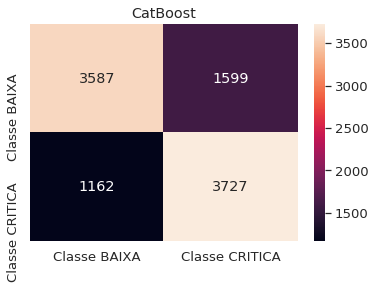

In [80]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import classification_report
from catboost import Pool, CatBoostClassifier
import lightgbm
%matplotlib inline

random_seed = 1234

#names = ["MLPClassifier"]
names = ["CatBoost"]

classifiers = [
    MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)]

classifiers = [CatBoostClassifier(depth= 10, l2_leaf_reg= 5, learning_rate= 0.03)]
                                        

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(imba_pipeline, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = imba_pipeline.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    sns.heatmap(df_cm,annot=True,fmt='d')
    #score = clf.score(X_test, y_test)
    #scores.append(score)


# **Rede Neural**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from keras.layers.core import Dropout
from keras.regularizers import l1
from sklearn.model_selection import RepeatedKFold

yf = np.array(y, dtype=np.float)
Xf = np.array(X, dtype=np.float)

num_folds = 10

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []

#X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=0.3)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)

#for train, test in kfold.split(Xf, yf):

for train, test in cv.split(Xf, yf):  
  classifier = Sequential()
  # Hidden Layer 1
  classifier.add(Dense(288, activation='relu', kernel_initializer='random_normal', input_dim=X.shape[1]))
  classifier.add(Dropout(0.10))
  # Hidden Layer 2
  classifier.add(Dense(144, activation='relu', kernel_initializer='random_normal'))#,activity_regularizer=l1(0.0001)))
  #classifier.add(Dropout(0.10))
  # Hidden Layer 3
  classifier.add(Dense(144, activation='relu', kernel_initializer='random_normal'))#,activity_regularizer=l1(0.0001)))
  #classifier.add(Dropout(0.25))
  # Hidden Layer 4
  classifier.add(Dense(72, activation='relu', kernel_initializer='random_normal'))
  #classifier.add(Dropout(0.25))
  # Hidden Layer 5
  classifier.add(Dense(72, activation='relu', kernel_initializer='random_normal'))
  #classifier.add(Dropout(0.25))
  # Hidden Layer 6
  classifier.add(Dense(36, activation='relu', kernel_initializer='random_normal'))
  #classifier.add(Dropout(0.5))
  # Hidden Layer 7
  classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))#,activity_regularizer=l1(0.0001)))
  classifier.add(Dropout(0.15))
  #Output Layer
  classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
  

  #Compiling the neural network
  classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  #Fitting the data to the training dataset
  #history = classifier.fit(X_train,y_train, batch_size=10,validation_data=(X_test, y_test), epochs=350)
  history = classifier.fit(Xf[train],yf[train],validation_data=(Xf[test],yf[test]), batch_size=64, epochs=400)

  scores = classifier.evaluate(Xf[test], yf[test], verbose=0)

  print(f'Score for fold {fold_no}: {classifier.metrics_names[0]} of {scores[0]}; {classifier.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1


#eval_model=classifier.evaluate(X_train, y_train)




A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 48/400
567/567 [==============================] - 4s 8ms/step - loss: 0.3230 - accuracy: 0.8545 - val_loss: 0.6783 - val_accuracy: 0.7154
Epoch 49/400
567/567 [==============================] - 4s 8ms/step - loss: 0.3143 - accuracy: 0.8574 - val_loss: 0.7433 - val_accuracy: 0.7223
Epoch 50/400
567/567 [==============================] - 4s 8ms/step - loss: 0.3144 - accuracy: 0.8581 - val_loss: 0.7070 - val_accuracy: 0.7261
Epoch 51/400
567/567 [==============================] - 4s 8ms/step - loss: 0.3166 - accuracy: 0.8586 - val_loss: 0.7531 - val_accuracy: 0.7149
Epoch 52/400
567/567 [==============================] - 4s 8ms/step - loss: 0.3061 - accuracy: 0.8618 - val_loss: 0.7276 - val_accuracy: 0.7169
Epoch 53/400
567/567 [==============================] - 5s 8ms/step - loss: 0.3040 - accuracy: 0.8636 - val_loss: 0.7175 - val_accuracy: 0.7174
Epoch 54/400
567/567 [==============================] - 4s 7ms/step - loss: 0

In [1]:
#acc_per_fold
#loss_per_fold

import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = acc_per_fold
    
    loss = loss_per_fold
    
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    #plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    #plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    #plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)  

NameError: ignored

NameError: ignored

In [125]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [2]:
loss, accuracy = classifier.evaluate(Xf[train],yf[train], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = classifier.evaluate(Xf[test],yf[test], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

#Xf[train],yf[train],validation_data=(Xf[test],yf[test]

NameError: ignored

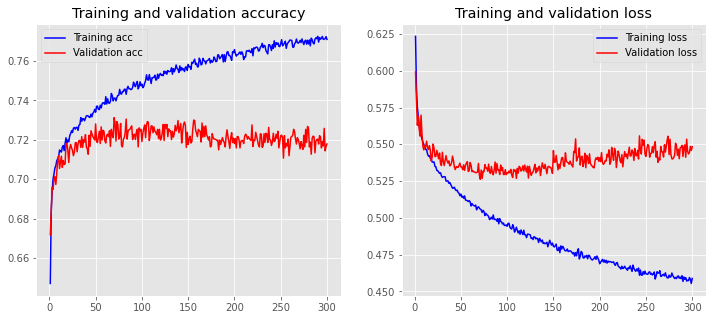

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)    

#dropout 0.25 em 2 camadas iniciais

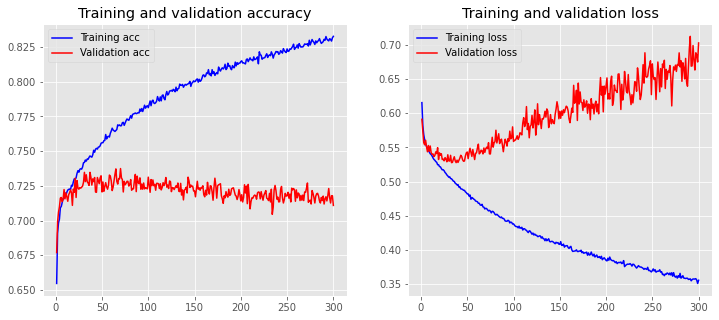

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)    

#dropout 0.10 em 2 camadas iniciais

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history) 

In [ ]:
path_modelo = "/content/drive/My Drive/Projeto Eddy Current/ProjetoFinal/modelo/4classes100E.hdf5"

print("[INFO] serializing network...")
model.save(path_modelo)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=["Cracking","Junta", "Solda","Squat"]))

In [129]:
report = classification_report(y_test, y_pred,target_names= classes)
report

'                precision    recall  f1-score   support\n\n  Classe BAIXA       0.70      0.69      0.70      6231\nClasse CRITICA       0.68      0.69      0.68      5859\n\n      accuracy                           0.69     12090\n     macro avg       0.69      0.69      0.69     12090\n  weighted avg       0.69      0.69      0.69     12090\n'

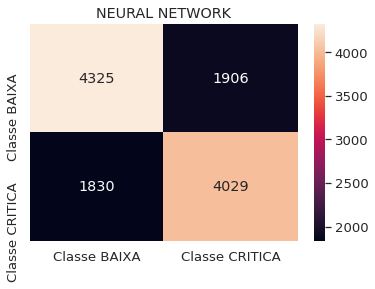

In [130]:
cm = confusion_matrix(y_test,y_pred)

sns.set(font_scale=1.2)
plt.figure(figsize=(6,4))
plt.title("NEURAL NETWORK")
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
sns.heatmap(df_cm,annot=True,fmt='d')

In [108]:
X_test.shape

(12090, 7)

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4305 1931]
 [1738 4116]]


# Curva **ROC**

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score



# Binarize the output

y_bin = label_binarize(Y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.5,
                                                    random_state=0)
random_seed = 1224
random_state = 1


# Learn to predict each class against the other

model = svm.SVC(kernel='linear', probability=True,random_state=random_state)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

classifier = OneVsRestClassifier(imba_pipeline)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y1_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


ValueError: ignored

In [19]:
y_test.ravel

<function ndarray.ravel>

In [108]:
pip install focal-loss

In [114]:
import numpy as np
from scipy import optimize
from scipy import special

class FocalLoss:

    def __init__(self, gamma, alpha=None):
        self.alpha = alpha
        self.gamma = gamma

    def at(self, y):
        if self.alpha is None:
            return np.ones_like(y)
        return np.where(y, self.alpha, 1 - self.alpha)

    def pt(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return np.where(y, p, 1 - p)

    def __call__(self, y_true, y_pred):
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        return -at * (1 - pt) ** self.gamma * np.log(pt)

    def grad(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma
        return at * y * (1 - pt) ** g * (g * pt * np.log(pt) + pt - 1)

    def hess(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma

        u = at * y * (1 - pt) ** g
        du = -at * y * g * (1 - pt) ** (g - 1)
        v = g * pt * np.log(pt) + pt - 1
        dv = g * np.log(pt) + g + 1

        return (du * v + u * dv) * y * (pt * (1 - pt))

    def init_score(self, y_true):
        res = optimize.minimize_scalar(
            lambda p: self(y_true, p).sum(),
            bounds=(0, 1),
            method='bounded'
        )
        p = res.x
        log_odds = np.log(p / (1 - p))
        return log_odds

    def lgb_obj(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        return self.grad(y, p), self.hess(y, p)

    def lgb_eval(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        is_higher_better = False
        return 'focal_loss', self(y, p).mean(), is_higher_better

In [124]:
import numpy as np
from joblib import Parallel, delayed
from sklearn.multiclass import _ConstantPredictor
from sklearn.preprocessing import LabelBinarizer
from scipy import special
import lightgbm as lgb


class OneVsRestLightGBMWithCustomizedLoss:

    def __init__(self, loss, n_jobs=3):
        self.loss = loss
        self.n_jobs = n_jobs

    def fit(self, X, y, **fit_params):

        self.label_binarizer_ = LabelBinarizer(sparse_output=True)
        Y = self.label_binarizer_.fit_transform(y)
        Y = Y.tocsc()
        self.classes_ = self.label_binarizer_.classes_
        columns = (col.toarray().ravel() for col in Y.T)
        if 'eval_set' in fit_params:
            # use eval_set for early stopping
            X_val, y_val = fit_params['eval_set'][0]
            Y_val = self.label_binarizer_.transform(y_val)
            Y_val = Y_val.tocsc()
            columns_val = (col.toarray().ravel() for col in Y_val.T)
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, X_val, column_val, **fit_params) for
                                                         i, (column, column_val) in
                                                         enumerate(zip(columns, columns_val)))
        else:
            # eval set not available
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, None, None, **fit_params) for i, column
                                                         in enumerate(columns))

        return self

    def _fit_binary(self, X, y, X_val, y_val, **fit_params):
        unique_y = np.unique(y)
        init_score_value = self.loss.init_score(y)
        if len(unique_y) == 1:
            estimator = _ConstantPredictor().fit(X, unique_y)
        else:
            fit = lgb.Dataset(X, y, init_score=np.full_like(y, init_score_value, dtype=float))
            if 'eval_set' in fit_params:
                val = lgb.Dataset(X_val, y_val, init_score=np.full_like(y_val, init_score_value, dtype=float),
                                  reference=fit)

                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      valid_sets=(fit, val),
                                      valid_names=('fit', 'val'),
                                      early_stopping_rounds=10,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)
            else:
                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)

        return estimator, init_score_value

    def predict(self, X):

        n_samples = X.shape[0]
        maxima = np.empty(n_samples, dtype=float)
        maxima.fill(-np.inf)
        argmaxima = np.zeros(n_samples, dtype=int)

        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            prob = special.expit(margins + init_score)
            np.maximum(maxima, prob, out=maxima)
            argmaxima[maxima == prob] = i

        return argmaxima

    def predict_proba(self, X):
        y = np.zeros((X.shape[0], len(self.results_)))
        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            y[:, i] = special.expit(margins + init_score)
        y /= np.sum(y, axis=1)[:, np.newaxis]
        return y

In [132]:
from joblib import Parallel, delayed
from sklearn.multiclass import _ConstantPredictor
from sklearn.preprocessing import LabelBinarizer
from scipy import special
import lightgbm as lgb
import torch
import torch.nn.functional as F
#from OneVsRestLightGBMWithCustomizedLoss import *
from focal_loss import BinaryFocalLoss
from sklearn.metrics import plot_confusion_matrix
import numpy as np
from joblib import Parallel, delayed
from sklearn.multiclass import _ConstantPredictor
from sklearn.preprocessing import LabelBinarizer
from scipy import special
import lightgbm as lgb


class OneVsRestLightGBMWithCustomizedLoss:

    def __init__(self, loss, n_jobs=3):
        self.loss = loss
        self.n_jobs = n_jobs

    def fit(self, X, y, **fit_params):

        self.label_binarizer_ = LabelBinarizer(sparse_output=True)
        Y = self.label_binarizer_.fit_transform(y)
        Y = Y.tocsc()
        self.classes_ = self.label_binarizer_.classes_
        columns = (col.toarray().ravel() for col in Y.T)
        if 'eval_set' in fit_params:
            # use eval_set for early stopping
            X_val, y_val = fit_params['eval_set'][0]
            Y_val = self.label_binarizer_.transform(y_val)
            Y_val = Y_val.tocsc()
            columns_val = (col.toarray().ravel() for col in Y_val.T)
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, X_val, column_val, **fit_params) for
                                                         i, (column, column_val) in
                                                         enumerate(zip(columns, columns_val)))
        else:
            # eval set not available
            self.results_ = Parallel(n_jobs=self.n_jobs)(delayed(self._fit_binary)
                                                         (X, column, None, None, **fit_params) for i, column
                                                         in enumerate(columns))

        return self

    def _fit_binary(self, X, y, X_val, y_val, **fit_params):
        unique_y = np.unique(y)
        init_score_value = self.loss.init_score(y)
        if len(unique_y) == 1:
            estimator = _ConstantPredictor().fit(X, unique_y)
        else:
            fit = lgb.Dataset(X, y, init_score=np.full_like(y, init_score_value, dtype=float))
            if 'eval_set' in fit_params:
                val = lgb.Dataset(X_val, y_val, init_score=np.full_like(y_val, init_score_value, dtype=float),
                                  reference=fit)

                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      valid_sets=(fit, val),
                                      valid_names=('fit', 'val'),
                                      early_stopping_rounds=10,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)
            else:
                estimator = lgb.train(params=fit_params,
                                      train_set=fit,
                                      fobj=self.loss.lgb_obj,
                                      feval=self.loss.lgb_eval,
                                      verbose_eval=10)

        return estimator, init_score_value

    def predict(self, X):

        n_samples = X.shape[0]
        maxima = np.empty(n_samples, dtype=float)
        maxima.fill(-np.inf)
        argmaxima = np.zeros(n_samples, dtype=int)

        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            prob = special.expit(margins + init_score)
            np.maximum(maxima, prob, out=maxima)
            argmaxima[maxima == prob] = i

        return argmaxima

    def predict_proba(self, X):
        y = np.zeros((X.shape[0], len(self.results_)))
        for i, (e, init_score) in enumerate(self.results_):
            margins = e.predict(X, raw_score=True)
            y[:, i] = special.expit(margins + init_score)
        y /= np.sum(y, axis=1)[:, np.newaxis]
        return y

# Instantiate Focal loss
loss = FocalLoss(alpha=0.75, gamma=2.0)

# Not using early stopping
clf = OneVsRestLightGBMWithCustomizedLoss(loss=loss)
clf.fit(X_train, y_train)

# Using early stopping
#fit_params = {'eval_set': [(X_test, y_test)]}
#clf.fit(X_train, y_train, **fit_params)

y_test_pred = clf.predict(X_test)
pred_accuracy_score = accuracy_score(y_test, y_test_pred)
pred_recall_score = recall_score(y_test, y_test_pred, average='macro')
print('prediction accuracy', pred_accuracy_score,' recall ', pred_recall_score)

cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=labeles)
plt.figure()
plot_confusion_matrix(cnf_matrix, labels=classes,normalize=True,title='Confusion matrix')
plt.show()

prediction accuracy 0.6950917203767972  recall  0.4645311938664789


TypeError: ignored

In [126]:
classes

['Class 0', 'Class 1', 'Class 2']